# **Practical Assignment 2: Multivariate Data Analysis for Data Quality Improvement**


[**The dataset "Rain in Australia"** ](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data)comprises approximately $10$ years of daily weather observations collected from various locations across Australia, providing a rich resource for analyzing meteorological patterns.

**The Characteristics of the Dataset:**
1. **Data structure:**

- Total number of variables: $23$

- Number of predictors: $22$

- Number of target variables: $1$

2. **The typology of predictors:**

- Categorical variables: $6$

- Quantitative/continuous variables: $16$

**The task** we aim to address using this dataset is to predict the target variable *RainTomorrow*, which indicates the presence or absence of rain the following day. This binary **classification problem** is significant as it answers the essential question: will it rain tomorrow?

This classification task will be approached through **supervised learning techniques**,  where we will train the model to recognize patterns in the historical weather data that correlate with the occurrence of rain.

**The effectiveness of our model** will be evaluated using standard metrics relevant to binary classification tasks, including accuracy, precision, recall, F1 score and AUC-ROC. These metrics will help us determine how well our model can discriminate between days with and without rain.

# **Results**

### **Import libraries**

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import  datasets, metrics, tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, spearmanr
from sklearn.preprocessing import OneHotEncoder
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

In [ ]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.3 MB/s eta 0:00:00


In [ ]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42568 sha256=d1af50577e2f45623911f966667b7405bbcb89b1e7492deae0a28d55e7c072ae
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.1 MB/s eta 0:00:00


In [ ]:
pip install bamt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.7/249.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.3/282.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.1/350.1 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 12.5 MB/s eta 0:00

In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
# Loading data
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv(r"/content/drive/MyDrive/weatherAUS.csv")
df.head()

Mounted at /content/drive/


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [ ]:
df = pd.read_csv(r"/Users/nargiza/Downloads/weatherAUS.csv")
df.head()

###**Binning & Discretization**

In [ ]:
import pandas as pd
import numpy as np
from bamt.networks.hybrid_bn import HybridBN
from sklearn import preprocessing as pp
import bamt.preprocessors as preprocessor
from pgmpy.estimators import K2Score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

encoder = pp.LabelEncoder()
discretizer = pp.KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
p = preprocessor.Preprocessor([("encoder", encoder), ("discretizer", discretizer)])
p1 = preprocessor.Preprocessor([("encoder", encoder)])
df = df.dropna()
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1}, na_action='ignore')

df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1}, na_action='ignore')
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.reset_index(inplace=True, drop=True)
df.drop('Date', axis=1, inplace = True)
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
df[categorical_columns], est=p1.apply(df[categorical_columns])
df[numerical_columns], est=p.apply(df[numerical_columns])




2024-12-10 19:22:41,880 | INFO     | preprocessors.py-scan-0099 | No one column is continuous
2024-12-10 19:22:42,005 | INFO     | preprocessors.py-scan-0107 | No one column is discrete


In [ ]:
sns.countplot(df, x='RainTomorrow')

The number of instances where "RainTomorrow" is 0 (no rain) is significantly higher than the number of instances where "RainTomorrow" is 1 (rain).
This imbalance might pose challenges for building accurate predictive models. Let's balance the classes.

##Bayesian network

In [ ]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BayesianEstimator
from pgmpy.sampling import BayesianModelSampling
from pgmpy.factors.discrete import State
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Создание структуры байесовской сети
hc = HillClimbSearch(df)
model = hc.estimate(max_indegree=3)

# Создание и обучение байесовской сети
bn = BayesianNetwork(model.edges())
bn.fit(df, estimator=BayesianEstimator)

# Балансировка классов
target_column = 'RainTomorrow'  # Замените на имя вашей целевой переменной

samples_to_generate = 30000

# Генерация дополнительных образцов для миноритарного класса с использованием rejection_sample
inference = BayesianModelSampling(bn)
evidence = [State(target_column, 1)]
additional_samples = inference.rejection_sample(evidence = evidence, size=samples_to_generate)
# Объединение исходных данных с дополнительными образцами
balanced_data = pd.concat([df, additional_samples], ignore_index=True)

# Переобучение сети на сбалансированных данных
bn.fit(balanced_data, estimator=BayesianEstimator)

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/30000 [00:00<?, ?it/s]

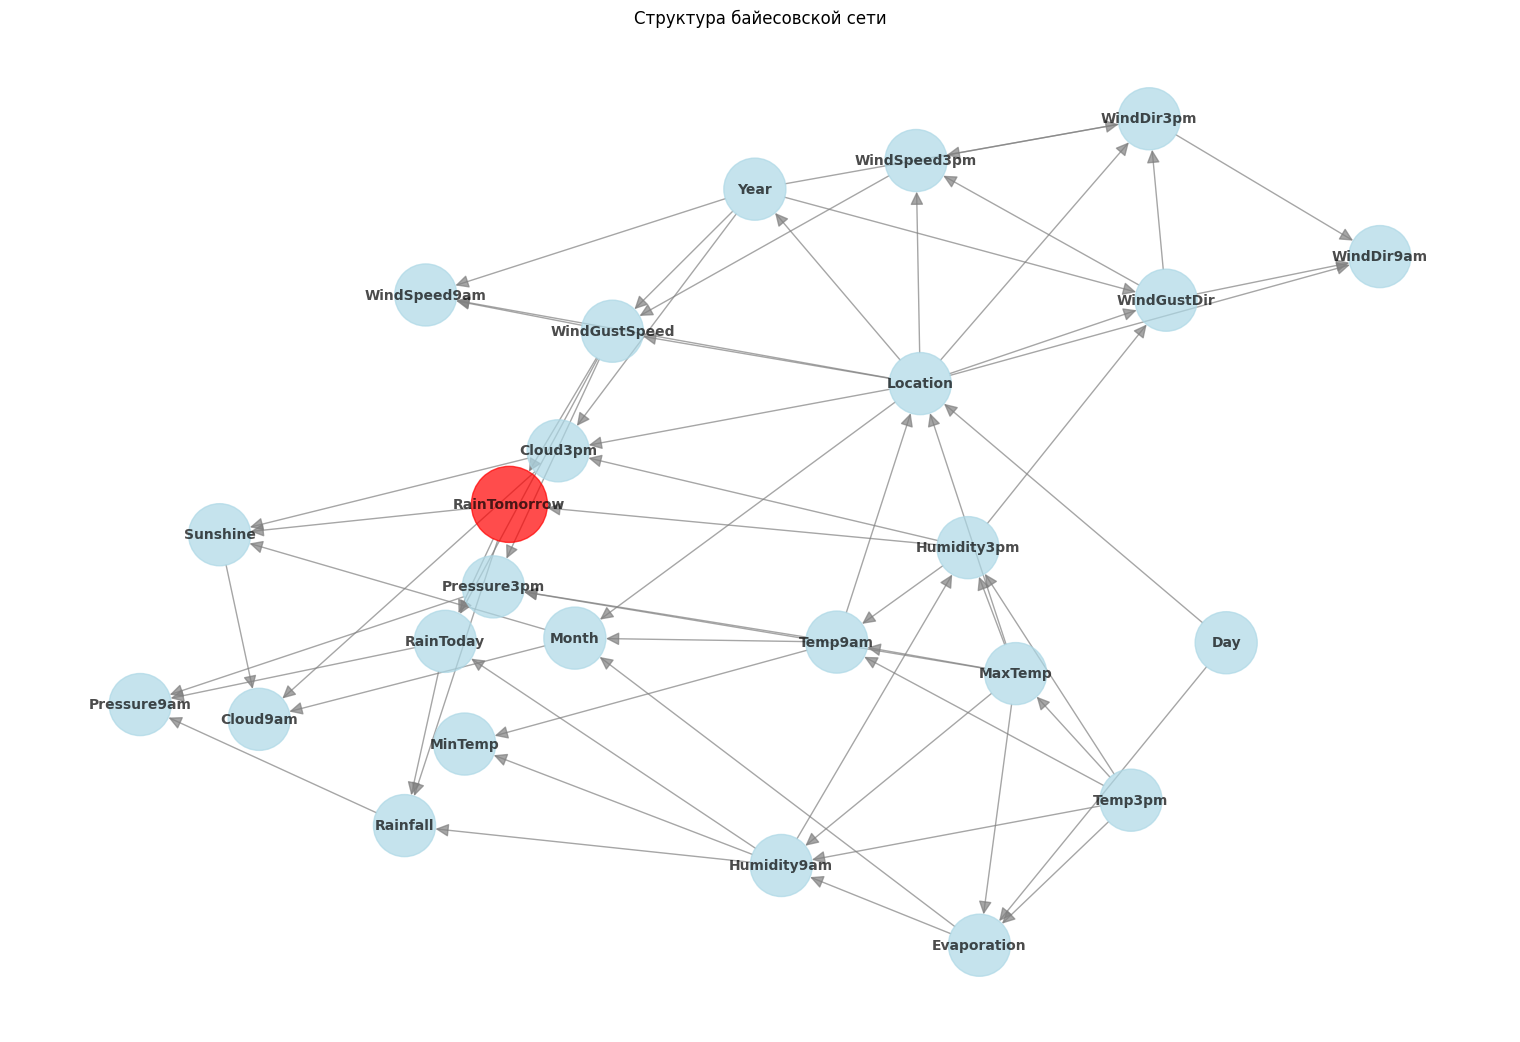

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Создание графа из рёбер байесовской сети

G = nx.DiGraph(bn.edges())

# Визуализация
plt.figure(figsize=(15, 10))

# Увеличиваем расстояние между вершинами, используя больший scale параметр
pos = nx.kamada_kawai_layout(G, scale=2.0)

# Отрисовка графа
node_colors = ['red' if node == 'RainTomorrow' else 'lightblue' for node in G.nodes()]
node_sizes = [3000 if node == 'RainTomorrow' else 2000 for node in G.nodes()]

nx.draw(G, pos,
        with_labels=True,
        node_color=node_colors,
        node_size=node_sizes,
        arrowsize=20,
        font_size=10,
        font_weight='bold',
        edge_color='gray',
        alpha=0.7)

plt.title("Структура байесовской сети")
plt.show()

**Conclusion:**

- Multiple nodes directly influence the probability of rain the next day. These include:
  - Weather Conditions: "Cloud3pm", "Pressure3pm", "WindGustSpeed", "Humidity3pm", "Sunshine", and "WindDir3pm".
  - Temperature: "Temp9am", "MinTemp", "MaxTemp", and "Month".
  - Location: This factor likely represents the geographical area, potentially impacting rainfall patterns.

- The network exhibits complex dependencies between variables. For example:
  - "Cloud3pm" and "Pressure3pm" influence "RainToday" and "RainTomorrow".
  - "Temp9am" and "Humidity9am" influence "MaxTemp" and "Humidity3pm".
  - "Location" influences various factors like "WindSpeed9am", "WindGustSpeed", "Temp9am", and "Humidity3pm".

This network suggests that past weather conditions, especially cloud cover, pressure, wind gusts, and humidity, are significant predictors of rain.
Temperature fluctuations, both minimum and maximum, as well as the time of year (Month) also contribute to the prediction.
Location plays a crucial role in influencing overall weather patterns and subsequently affects the prediction of rainfall.

In [ ]:
from pgmpy.estimators.CITests import chi_square

# Функция для проверки условной независимости
def test_conditional_independence(data, var1, var2, cond_vars=None):
    if cond_vars is None:
        cond_vars = []
    chi2, p_value, _ = chi_square(var1, var2, cond_vars, data, boolean=False)
    return p_value > 0.05  # Возвращает True если переменные условно независимы

# Проверка основных погодных переменных
weather_vars = ['RainTomorrow', 'RainToday', 'Humidity3pm', 'Pressure3pm','MinTemp', 'MaxTemp']

for i in range(len(weather_vars)):
    for j in range(i+1, len(weather_vars)):
        var1, var2 = weather_vars[i], weather_vars[j]
        remaining_vars = [v for v in weather_vars if v not in [var1, var2]]

        is_independent = test_conditional_independence(
            balanced_data, var1, var2, remaining_vars
        )
        print(f"{var1} и {var2} условно {'независимы' if is_independent else 'зависимы'}")

RainTomorrow и RainToday условно независимы
RainTomorrow и Humidity3pm условно зависимы
RainTomorrow и Pressure3pm условно зависимы
RainTomorrow и MinTemp условно зависимы
RainTomorrow и MaxTemp условно зависимы
RainToday и Humidity3pm условно зависимы
RainToday и Pressure3pm условно зависимы
RainToday и MinTemp условно зависимы
RainToday и MaxTemp условно зависимы
Humidity3pm и Pressure3pm условно зависимы
Humidity3pm и MinTemp условно зависимы
Humidity3pm и MaxTemp условно зависимы
Pressure3pm и MinTemp условно зависимы
Pressure3pm и MaxTemp условно зависимы
MinTemp и MaxTemp условно зависимы


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X = balanced_data.drop('RainTomorrow', axis = 1).values
y = balanced_data['RainTomorrow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_balanced = LogisticRegression(max_iter = 1000)
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)
print("\nРезультаты классификации:")
print(classification_report(y_test, y_pred_balanced))
y_pred_balanced = model_balanced.predict(X_test)
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
f1_balanced = f1_score(y_test, y_pred_balanced)
roc_auc_balanced = roc_auc_score(y_test, y_pred_balanced)

print('Accuracy = ', accuracy_balanced)
print('F-1 Score = ', f1_balanced)
print('ROC-AUC = ', roc_auc_balanced)


Результаты классификации:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79     10980
           1       0.78      0.78      0.78     10625

    accuracy                           0.79     21605
   macro avg       0.79      0.79      0.79     21605
weighted avg       0.79      0.79      0.79     21605

Accuracy =  0.7860680398056006
F-1 Score =  0.7822276667923106
ROC-AUC =  0.7859904853744777


### **1. Initial Multivariate Analysis:**

#### **Correlation Matrix and Scatterplots:**

In [ ]:
numerical_data = df[numerical_columns]
numerical_data = data.reset_index(drop=True)

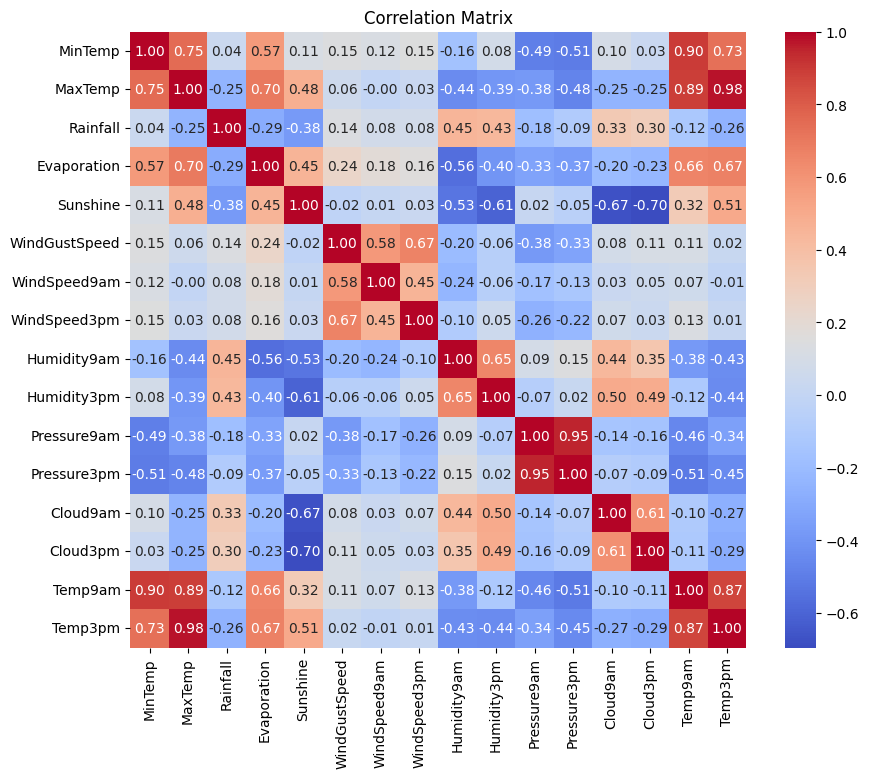

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Построение корреляционной матрицы
plt.figure(figsize=(10,8))
sns.heatmap(numerical_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

According to the correlation matrix, we can see the following:

- **High Positive Correlation:**
  - Temperature: MinTemp, MaxTemp, Temp9am, and Temp3pm all show a strong positive correlation with each other.
  - Wind: WindGustSpeed, WindSpeed9am, and WindSpeed3pm also display a strong positive correlation.
  - Humidity: Humidity9am and Humidity3pm have a significant positive correlation.
  - Pressure: Pressure9am and Pressure3pm demonstrate a high positive correlation.
- **High Negative Correlation:**
  - Evaporation and Temperature: Evaporation has a high negative correlation with MinTemp, MaxTemp, Temp9am, and Temp3pm.
  - Sunshine and Temperature: Sunshine exhibits a negative correlation with both MinTemp and MaxTemp.
  - Sunshine and Humidity: Sunshine has a strong negative correlation with both Humidity9am and Humidity3pm.
- **Moderate Correlation:**
  - Rainfall and Temperature: Rainfall has a moderate negative correlation with both MinTemp and MaxTemp.
  - Wind and Pressure: WindGustSpeed, WindSpeed9am, and WindSpeed3pm show a moderate negative correlation with Pressure9am and Pressure3pm.
  - Cloud Cover and Temperature: Cloud9am and Cloud3pm demonstrate a moderate negative correlation with MinTemp, MaxTemp, Temp9am, and Temp3pm.
- **Weak Correlation:**
  - Rainfall and Wind: Rainfall has a weak correlation with wind variables (WindGustSpeed, WindSpeed9am, WindSpeed3pm).

As we've already used binning, scaterplots won't be very informative for us. But let's make sure.

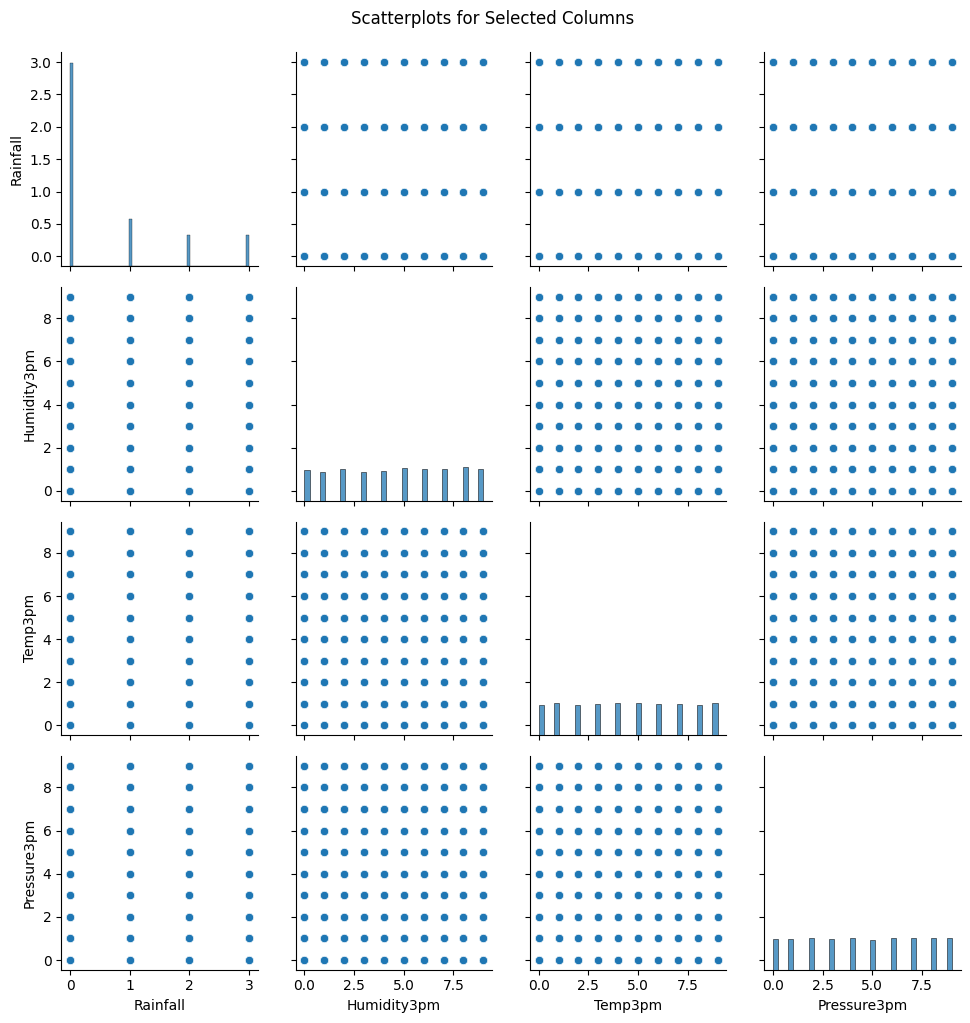

In [ ]:
selected_columns = ['Rainfall', 'Humidity3pm', 'Temp3pm', 'Pressure3pm']
g = sns.PairGrid(numerical_data[selected_columns])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.fig.suptitle('Scatterplots for Selected Columns', y=1.02)
plt.show()

#### **Multicollinearity Detection:**

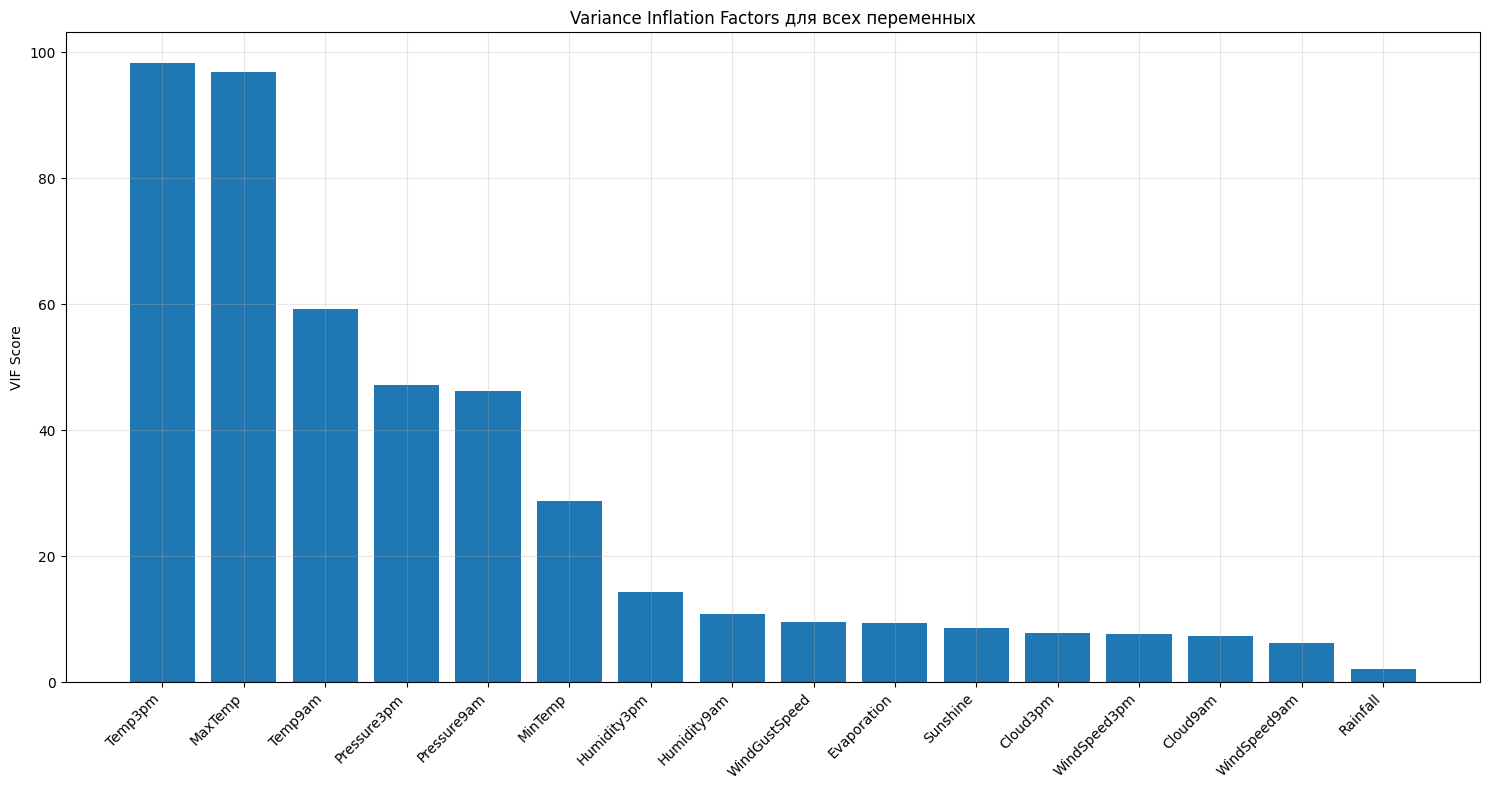


VIF для всех переменных:
     Variable       VIF
      Temp3pm 98.214940
      MaxTemp 96.814890
      Temp9am 59.285549
  Pressure3pm 47.107777
  Pressure9am 46.227233
      MinTemp 28.777180
  Humidity3pm 14.292518
  Humidity9am 10.853161
WindGustSpeed  9.579187
  Evaporation  9.454255
     Sunshine  8.522223
     Cloud3pm  7.772941
 WindSpeed3pm  7.715617
     Cloud9am  7.336704
 WindSpeed9am  6.147055
     Rainfall  2.148740

Группировка переменных по уровню мультиколлинеарности:

Сильная мультиколлинеарность (VIF > 5):
     Variable       VIF
      Temp3pm 98.214940
      MaxTemp 96.814890
      Temp9am 59.285549
  Pressure3pm 47.107777
  Pressure9am 46.227233
      MinTemp 28.777180
  Humidity3pm 14.292518
  Humidity9am 10.853161
WindGustSpeed  9.579187
  Evaporation  9.454255
     Sunshine  8.522223
     Cloud3pm  7.772941
 WindSpeed3pm  7.715617
     Cloud9am  7.336704
 WindSpeed9am  6.147055

Умеренная мультиколлинеарность (2 < VIF ≤ 5):
Variable     VIF
Rainfall 2.14874

Низ

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Подготовка данных
X = numerical_data

# Расчет VIF для каждой переменной
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

# Получение VIF для всех переменных
vif_data = calculate_vif(X)

# Визуализация VIF для всех переменных
plt.figure(figsize=(15, 8))
plt.bar(range(len(vif_data)), vif_data['VIF'])
plt.xticks(range(len(vif_data)), vif_data['Variable'], rotation=45, ha='right')
plt.title('Variance Inflation Factors для всех переменных')
plt.ylabel('VIF Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Вывод всех переменных с их VIF значениями
print("\nVIF для всех переменных:")
print(vif_data.to_string(index=False))

# Группировка переменных по уровню мультиколлинеарности
print("\nГруппировка переменных по уровню мультиколлинеарности:")
print("\nСильная мультиколлинеарность (VIF > 5):")
print(vif_data[vif_data['VIF'] > 5].to_string(index=False))
print("\nУмеренная мультиколлинеарность (2 < VIF ≤ 5):")
print(vif_data[(vif_data['VIF'] > 2) & (vif_data['VIF'] <= 5)].to_string(index=False))
print("\nНизкая мультиколлинеарность (VIF ≤ 2):")
print(vif_data[vif_data['VIF'] <= 2].to_string(index=False))



In our further analysis and model building, we will take into account the identified strong multicollinearity between variables. This is particularly significant for temperature measurements (MinTemp, MaxTemp, Temp9am, Temp3pm), pressure readings (Pressure9am, Pressure3pm), and other interconnected parameters. These findings will guide our feature selection decisions to potentially build a more robust and efficient model.



### **2. Advanced Multivariate Methods:**

#### **Principal Component Analysis (PCA):**

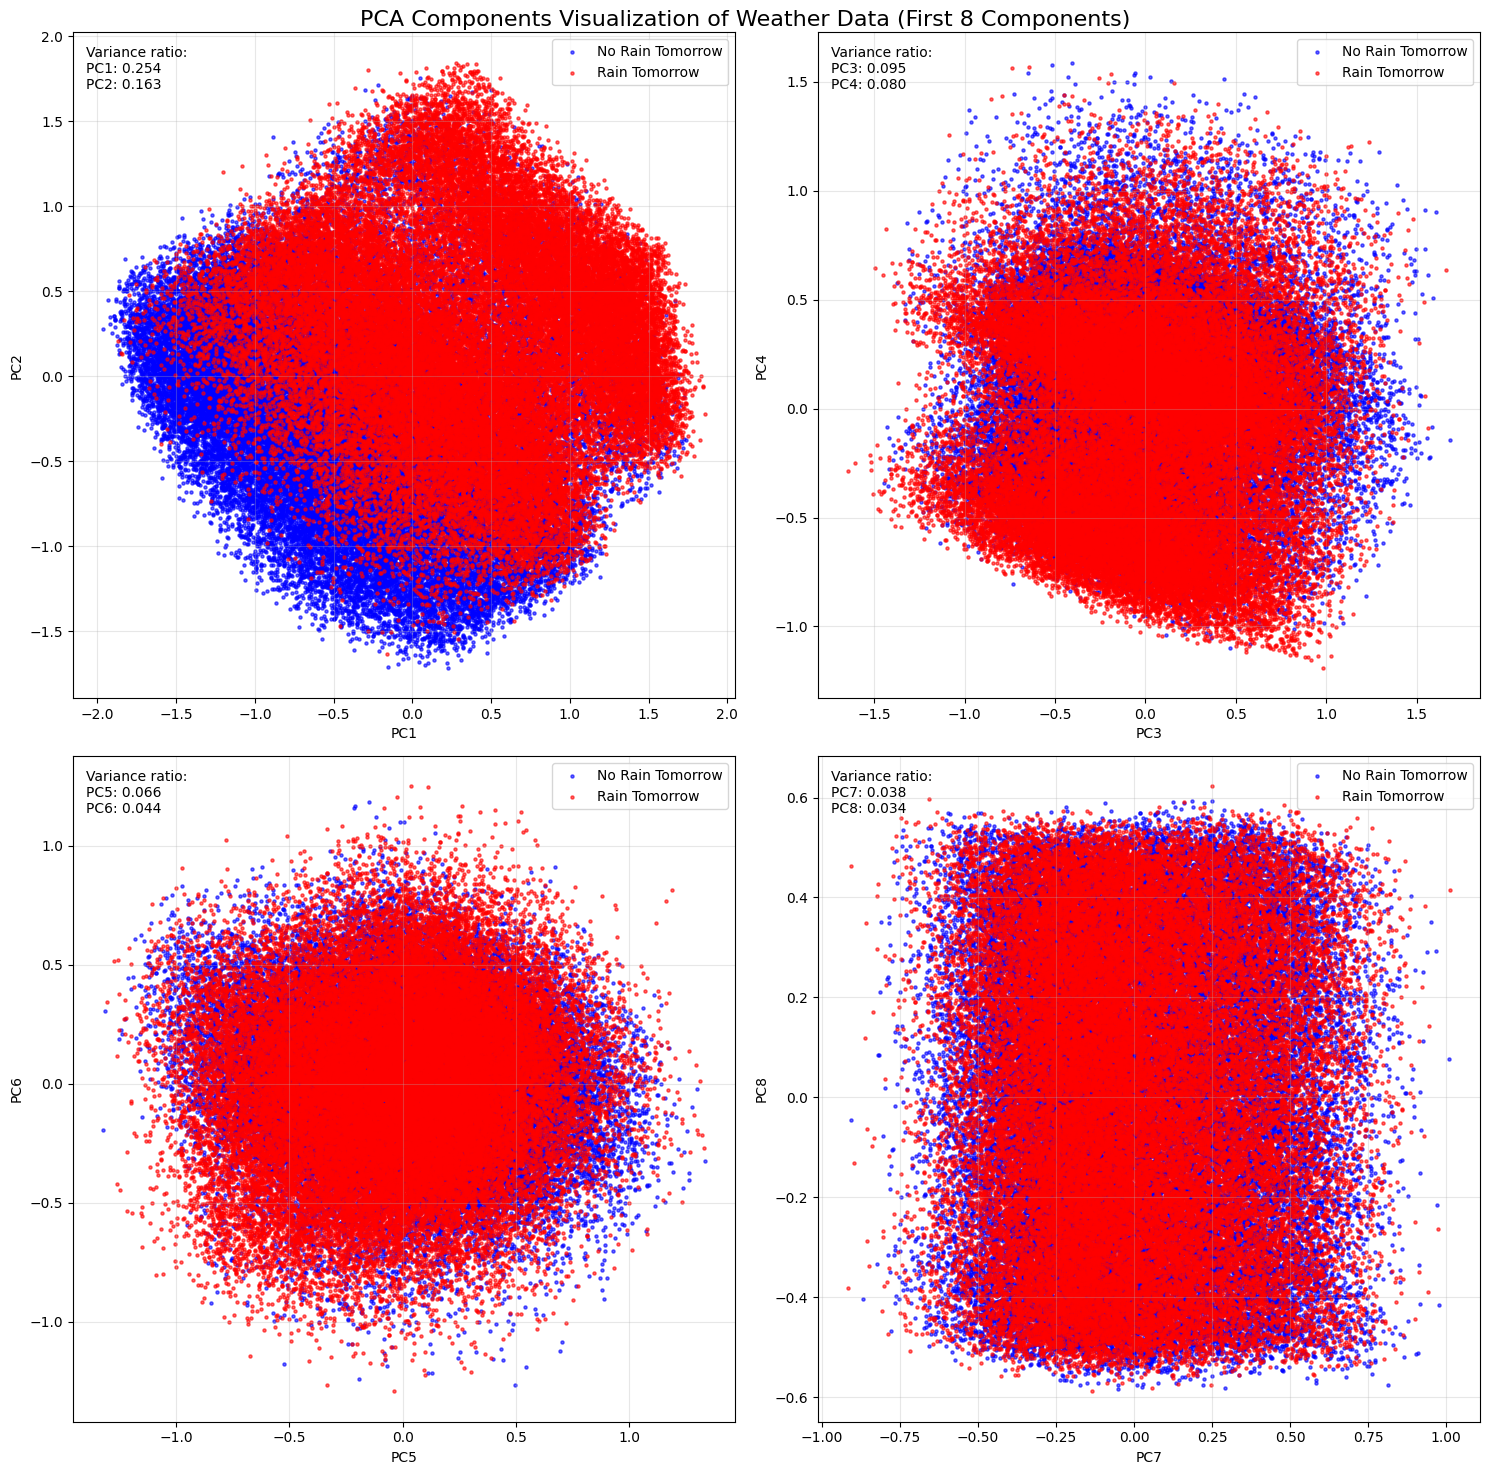

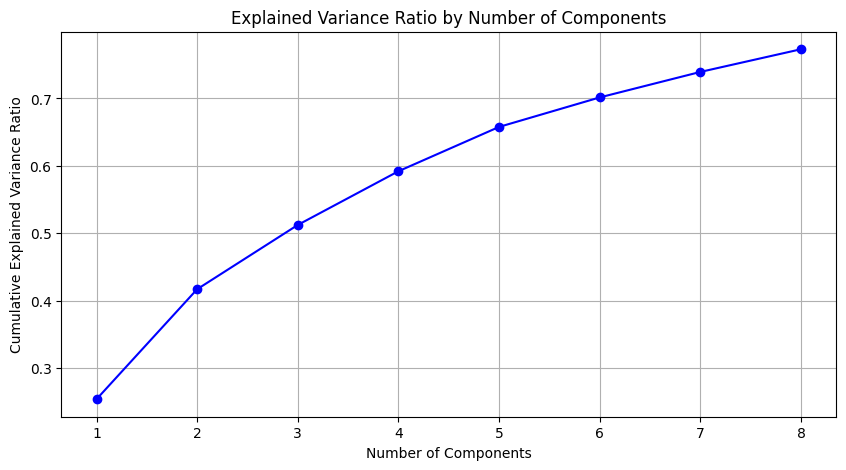

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Подготовка данных
X = balanced_data.drop('RainTomorrow', axis=1).values
y = balanced_data['RainTomorrow'].values

# Масштабирование данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA с 8 компонентами
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

# Создаем сетку графиков 2x2 для первых 8 компонент
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

# Визуализация каждой пары компонент
for i in range(4):  # 4 графика для 8 компонент (попарно)
    ax = axes[i]
    comp1, comp2 = i*2, i*2+1

    ax.scatter(X_pca[y == 0, comp1], X_pca[y == 0, comp2],
              c='blue', label='No Rain Tomorrow', alpha=0.6, s=5)
    ax.scatter(X_pca[y == 1, comp1], X_pca[y == 1, comp2],
              c='red', label='Rain Tomorrow', alpha=0.6, s=5)

    ax.set_xlabel(f'PC{comp1+1}')
    ax.set_ylabel(f'PC{comp2+1}')
    ax.grid(True, alpha=0.3)
    ax.legend()

    # Добавляем процент объясненной дисперсии
    var_ratio = pca.explained_variance_ratio_[comp1:comp2+1]
    ax.text(0.02, 0.98, f'Variance ratio:\nPC{comp1+1}: {var_ratio[0]:.3f}\nPC{comp2+1}: {var_ratio[1]:.3f}',
            transform=ax.transAxes, verticalalignment='top')

plt.suptitle('PCA Components Visualization of Weather Data (First 8 Components)', fontsize=16)
plt.tight_layout()
plt.show()

# Визуализация объясненной дисперсии для первых 8 компонент
plt.figure(figsize=(10, 5))
plt.plot(range(1, 9), np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()



**Component Significance**
The first two principal components (PC1 and PC2) account for 41.7% of the total variance (25.4% and 16.3% respectively), indicating moderate dimensionality reduction effectiveness.

**Variance Distribution**
- First 4 components capture approximately 59% of total variance
- Components 5-8 contribute incrementally smaller amounts (6.6%, 4.4%, 3.8%, and 3.4% respectively)
- The cumulative explained variance reaches about 75% with 8 components

**Class Separation**
The visualization shows considerable overlap between "Rain Tomorrow" and "No Rain Tomorrow" classes across all component pairs, suggesting that:
- Linear separation of classes is challenging
- Weather patterns leading to rain are complex and not easily distinguishable using simple linear combinations
- Additional feature engineering or non-linear methods might be necessary

**Dimensionality Reduction**
Based on the cumulative explained variance plot, using 4-5 principal components would preserve approximately 60-65% of the original data variance, offering a reasonable balance between dimensionality reduction and information retention.


#### **t-SNE (t-Distributed Stochastic Neighbor Embedding):**

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Подготовка данных
X = balanced_data.drop('RainTomorrow', axis=1).values
y = balanced_data['RainTomorrow'].values

# Масштабирование данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(figsize=(20, 6))

tsne = TSNE(
    n_components=2,
    perplexity=50,
    n_iter=1000,
    random_state=42,
    learning_rate='auto',
    init='pca'
    )

X_tsne = tsne.fit_transform(X_scaled)

axes.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1],
                   c='blue', label='No Rain Tomorrow', alpha=0.6, s=5)
axes.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1],
                   c='red', label='Rain Tomorrow', alpha=0.6, s=5)

axes.set_title(f't-SNE ')
axes.set_xlabel('t-SNE1')
axes.set_ylabel('t-SNE2')
axes.legend()
axes.grid(True, alpha=0.3)

plt.suptitle('t-SNE Visualization of Weather Data', fontsize=16)
plt.tight_layout()
plt.show()




**Class Distribution**
The t-SNE visualization reveals several distinct cluster structures, where data forms characteristic "islands" in two-dimensional space.

**Class Separation**
- Partial separation is observed between "Rain Tomorrow" and "No Rain Tomorrow" classes
- Some areas show clear clustering of blue points (No Rain Tomorrow)
- Mixing zones are present, especially in central visualization areas

**Data Structure**
- Formation of several large clusters indicates the presence of different weather patterns
- Continuous transition between some clusters suggests gradual changes in weather conditions
- Presence of isolated point groups may indicate unique weather situations

**Practical Implications**
The t-SNE visualization confirms the complexity of rain prediction task, as classes lack clear linear separation.


#### **UMAP (Uniform Manifold Approximation and Projection):**

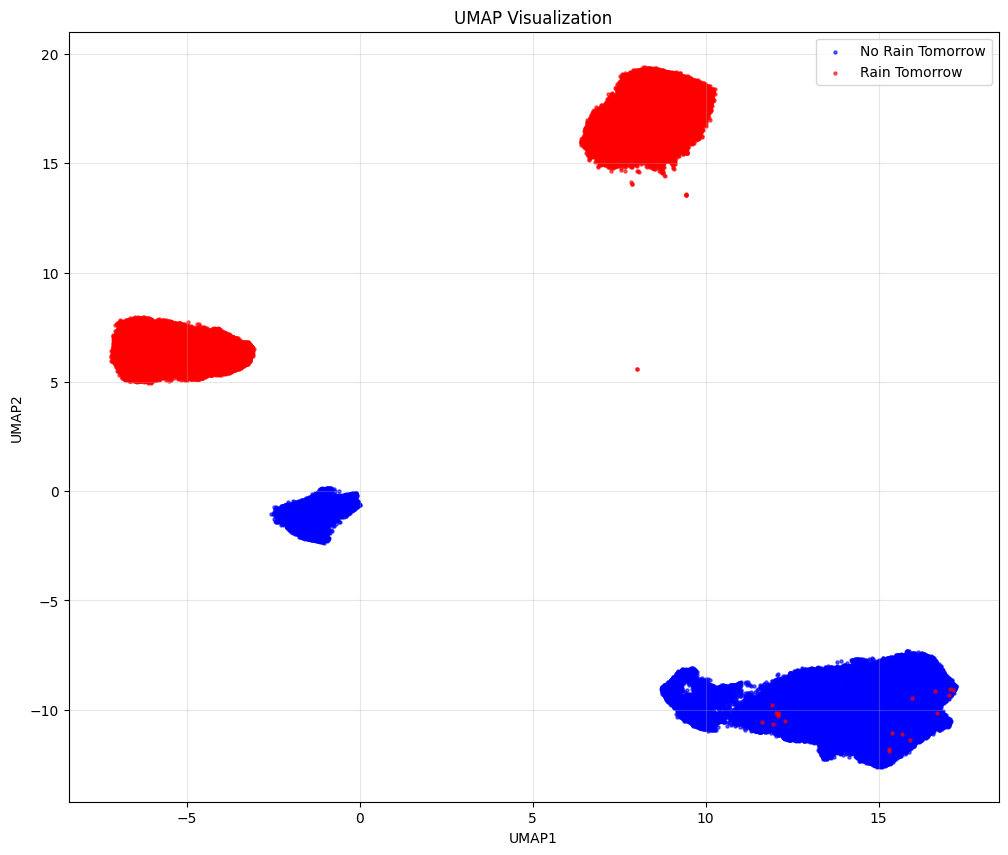

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

# Разделение данных
X = balanced_data.drop('RainTomorrow', axis=1).values
y = balanced_data['RainTomorrow'].values

# Предобработка данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Настройка и обучение supervised UMAP
mapper = umap.UMAP(
    n_components=2,
    n_neighbors=50,
    min_dist=0.1,
    metric='cosine',
    random_state=42,
    n_epochs=200,
    transform_queue_size=4.0
)

# Обучаем UMAP на тренировочных данных с метками классов
X_umap = mapper.fit_transform(X, y)


# Визуализация обучающих данных
plt.figure(figsize=(12, 10))
plt.scatter(X_umap[y == 0, 0], X_umap[y == 0, 1],
           c='blue', label='No Rain Tomorrow', alpha=0.6, s=5)
plt.scatter(X_umap[y == 1, 0], X_umap[y == 1, 1],
           c='red', label='Rain Tomorrow', alpha=0.6, s=5)
plt.title('UMAP Visualization')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



**Cluster Formation**
UMAP visualization reveals distinct and well-separated clusters in the data, showing three main groupings with clear boundaries between them.

**Class Distribution**
- Two prominent red clusters (Rain Tomorrow) are located in the upper and middle-left regions
- One large blue cluster (No Rain Tomorrow) appears in the lower-right portion
- A smaller blue cluster is positioned in the middle region

**Separation Quality**
- Classes show remarkable separation compared to other dimensionality reduction methods
- Minimal overlap between rain and no-rain classes
- Clear boundaries between clusters suggest strong underlying weather patterns

**Practical Implications**
The clear separation of clusters indicates that UMAP has successfully captured meaningful weather patterns, suggesting that the underlying features contain strong discriminative power for rain prediction. This visualization demonstrates better class separation than both t-SNE and PCA representations and so we will also use it later.

#### **Factor Analysis:**

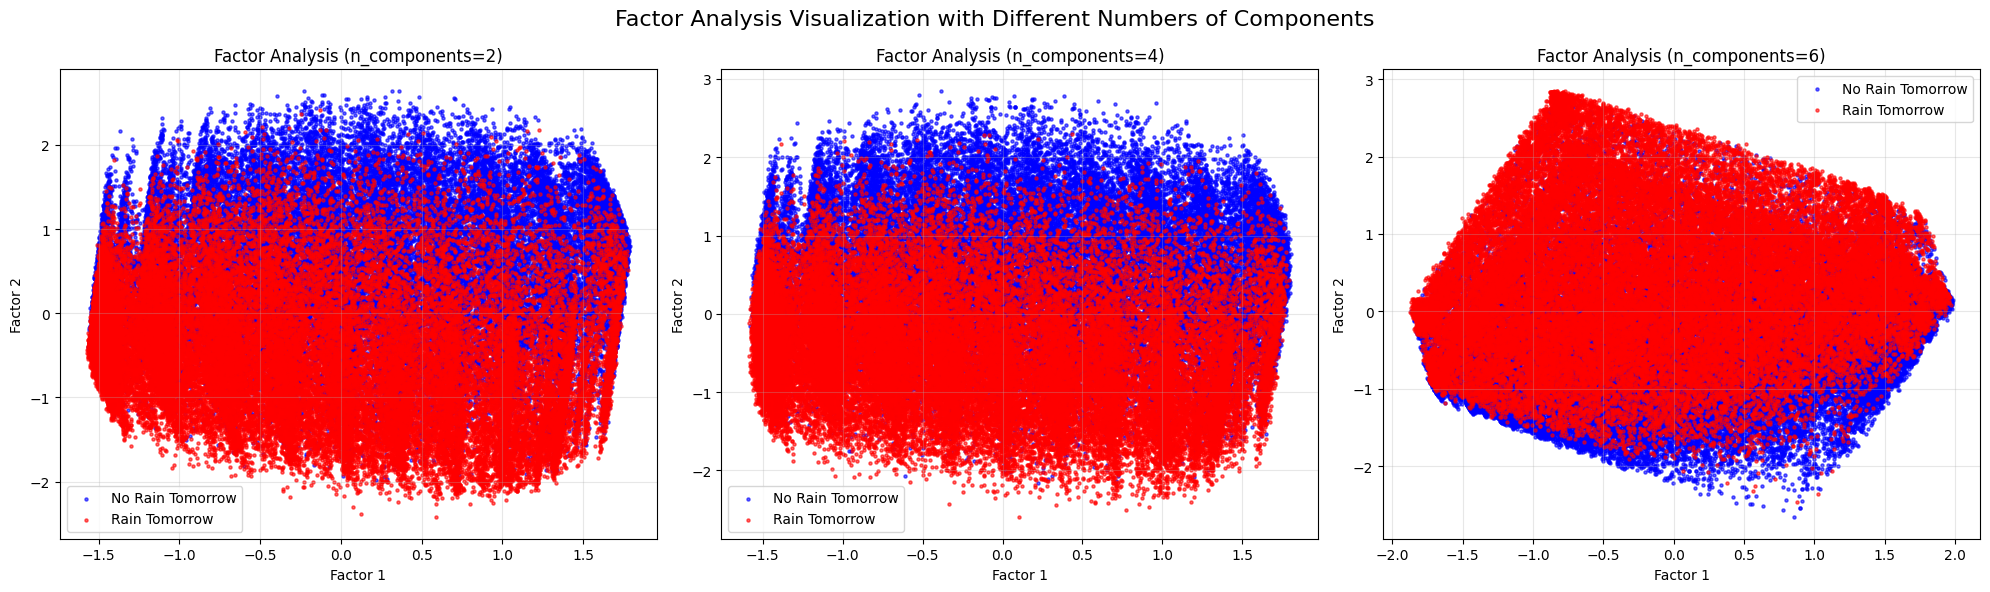

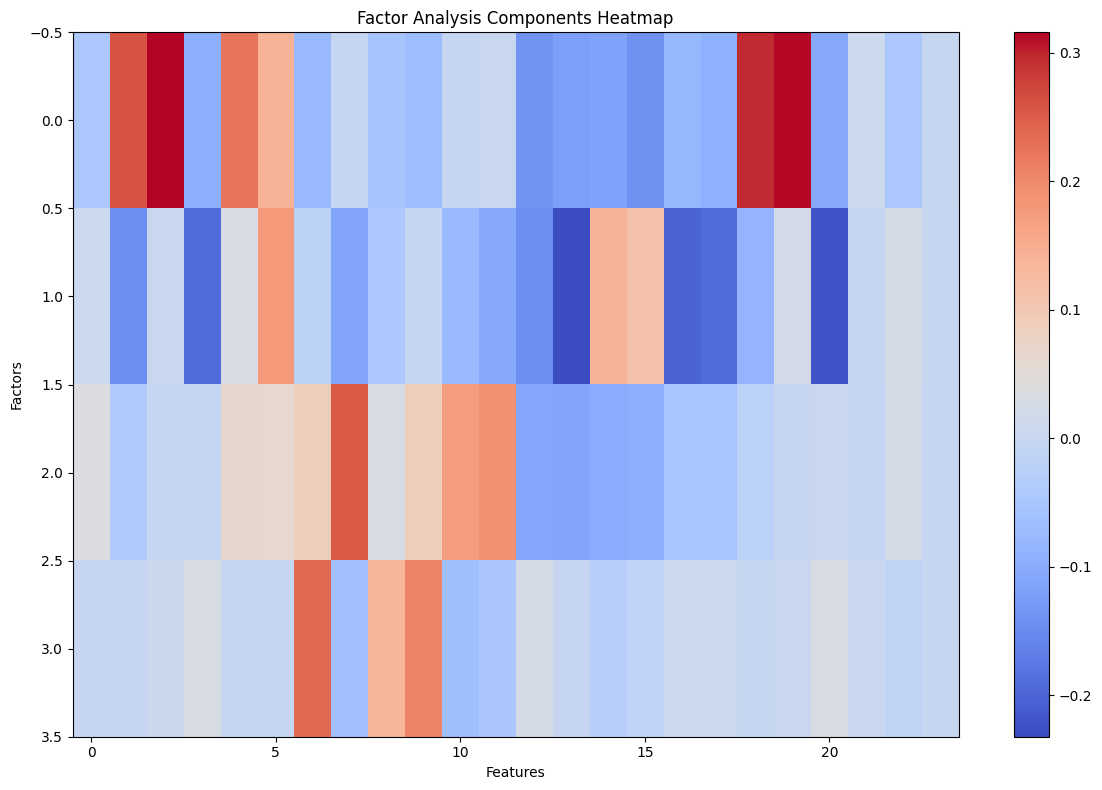

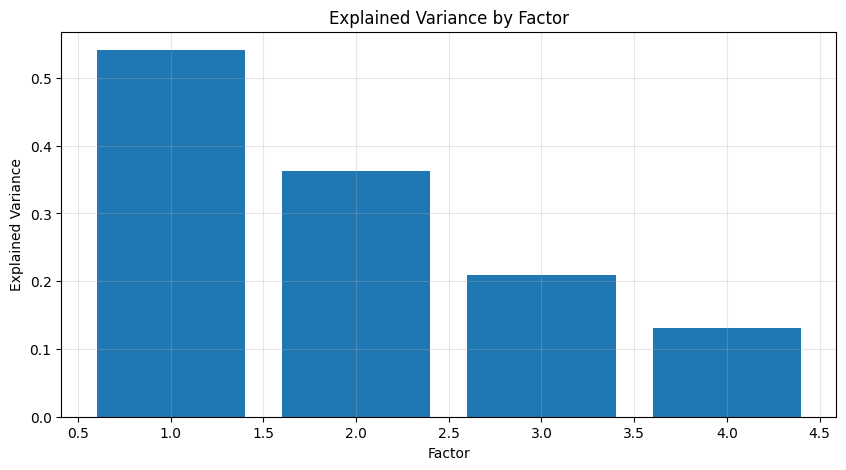

In [ ]:
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Подготовка данных
X = balanced_data.drop('RainTomorrow', axis=1).values
y = balanced_data['RainTomorrow'].values

# Масштабирование данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Применение факторного анализа с разным числом компонент
n_components_list = [2, 4, 6]
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, n_comp in enumerate(n_components_list):
    fa = FactorAnalysis(
        n_components=n_comp,
        random_state=42,
        max_iter=1000
    )

    X_fa = fa.fit_transform(X_scaled)

    # Визуализация первых двух компонент
    axes[i].scatter(X_fa[y == 0, 0], X_fa[y == 0, 1],
                   c='blue', label='No Rain Tomorrow', alpha=0.6, s=5)
    axes[i].scatter(X_fa[y == 1, 0], X_fa[y == 1, 1],
                   c='red', label='Rain Tomorrow', alpha=0.6, s=5)

    axes[i].set_title(f'Factor Analysis (n_components={n_comp})')
    axes[i].set_xlabel('Factor 1')
    axes[i].set_ylabel('Factor 2')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Factor Analysis Visualization with Different Numbers of Components', fontsize=16)
plt.tight_layout()
plt.show()

# Детальный анализ с оптимальным числом компонент
fa_optimal = FactorAnalysis(
    n_components=4,
    random_state=42,
    max_iter=1000
)

X_fa_optimal = fa_optimal.fit_transform(X_scaled)

# Визуализация матрицы компонент
plt.figure(figsize=(12, 8))
plt.imshow(fa_optimal.components_, aspect='auto', cmap='coolwarm')
plt.colorbar()
plt.title('Factor Analysis Components Heatmap')
plt.xlabel('Features')
plt.ylabel('Factors')
plt.tight_layout()
plt.show()

# Визуализация объясненной дисперсии
plt.figure(figsize=(10, 5))
variance = np.sum(fa_optimal.components_**2, axis=1)
plt.bar(range(1, len(variance) + 1), variance)
plt.xlabel('Factor')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Factor')
plt.grid(True, alpha=0.3)
plt.show()


According to the plots, we can see the following:

1) The images showcase a Factor Analysis visualization with different numbers of components. Analyzing the plots, we can observe the following:
- The plots show that the data points corresponding to "No Rain Tomorrow" (blue) and "Rain Tomorrow" (red) are generally separated, indicating that the Factor Analysis has captured some meaningful information about the data.
- As the number of components increases from 2 to 4 to 6, the separation between the classes becomes more evident.
- The plot with 6 components seems to offer the best separation, suggesting that increasing the number of components can enhance the visualization of the data's structure.

2) The heatmap displays the loadings of each factor on the different features.

P.S. The horizontal axis represents the features that were analyzed. The vertical axis represents the factors extracted from the analysis. The color intensity represents the strength of the loading. Red represents a positive loading, while blue represents a negative loading.

- Factor 0: This factor seems to have a strong positive loading on features 1 and 2, and a strong negative loading on feature 21. This suggests that factor 0 is related to these features.
- Factor 1: This factor has strong positive loadings on features 0, 1, 2, and 4. This suggests that factor 1 is related to these features.
- Factor 2: This factor has a strong positive loading on feature 6 and strong negative loading on features 14 and 15. This suggests that factor 2 is related to these features.
- Factor 3: This factor has strong positive loadings on features 7, 8, and 9, and a strong negative loading on feature 13. This suggests that factor 3 is related to these features.

3) The bar chart illustrates the explained variance by each factor.
- Factor 1 has the highest explained variance, indicating that it contributes the most to explaining the variation in the data.
- Factor 2 has the second highest explained variance, followed by Factor 3.
- Factor 4 has the lowest explained variance.

The first two factors are most important in explaining the data variation. Factors 3 and 4 contribute less to the overall variation in the data.ata.

**Now we will fit linear regression with data after factor analysis, so as to understand, whether we will benefit from it or not.**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X = pd.DataFrame(X_fa_optimal)
y = balanced_data['RainTomorrow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_fact = LogisticRegression(max_iter = 1000)
model_fact.fit(X_train, y_train)
y_pred_fact = model_fact.predict(X_test)
print("\nРезультаты классификации:")
print(classification_report(y_test, y_pred_fact))
y_pred_fact = model_fact.predict(X_test)
accuracy_fact = accuracy_score(y_test, y_pred_fact)
f1_fact = f1_score(y_test, y_pred_fact)
roc_auc_fact = roc_auc_score(y_test, y_pred_fact)

print('Accuracy = ', accuracy_fact)
print('F-1 Score = ', f1_fact)
print('ROC-AUC = ', roc_auc_fact)


Результаты классификации:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     10980
           1       0.75      0.77      0.76     10625

    accuracy                           0.76     21605
   macro avg       0.76      0.76      0.76     21605
weighted avg       0.76      0.76      0.76     21605

Accuracy =  0.7587132608192548
F-1 Score =  0.7583329470121923
ROC-AUC =  0.758892296153434


**The quality of the model decreazed :(**

#### **Clustering Analysis:**

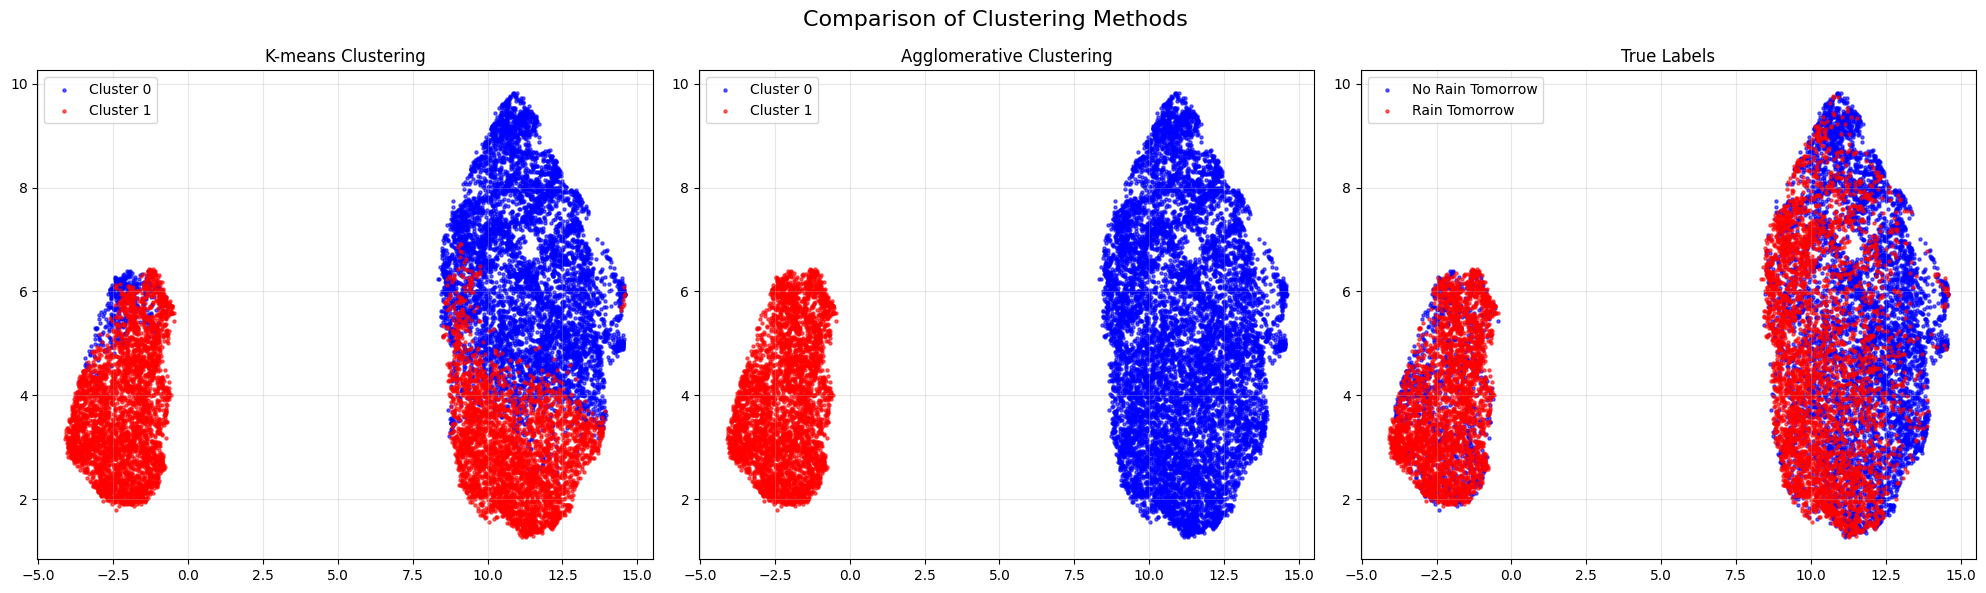


Метрики качества кластеризации:
K-means ARI: 0.103
K-means Silhouette: 0.160
Agglomerative ARI: 0.094
Agglomerative Silhouette: 0.171


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Уменьшаем размер данных, взяв случайную подвыборку
sample_size = 15000
np.random.seed(42)
indices = np.random.choice(len(balanced_data), sample_size, replace=False)

# Подготовка данных на подвыборке
X = balanced_data.iloc[indices].drop('RainTomorrow', axis=1).values
y = balanced_data.iloc[indices]['RainTomorrow'].values

# Масштабирование данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# UMAP на уменьшенной выборке
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Создаем сетку для методов кластеризации
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

axes[0].scatter(X_umap[kmeans_labels == 0, 0], X_umap[kmeans_labels == 0, 1],
                c='blue', label='Cluster 0', alpha=0.6, s=5)
axes[0].scatter(X_umap[kmeans_labels == 1, 0], X_umap[kmeans_labels == 1, 1],
                c='red', label='Cluster 1', alpha=0.6, s=5)
axes[0].set_title('K-means Clustering')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Агломеративная кластеризация
agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(X_scaled)

axes[1].scatter(X_umap[agg_labels == 0, 0], X_umap[agg_labels == 0, 1],
                c='blue', label='Cluster 0', alpha=0.6, s=5)
axes[1].scatter(X_umap[agg_labels == 1, 0], X_umap[agg_labels == 1, 1],
                c='red', label='Cluster 1', alpha=0.6, s=5)
axes[1].set_title('Agglomerative Clustering')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Сравнение с реальными метками
axes[2].scatter(X_umap[y == 0, 0], X_umap[y == 0, 1],
                c='blue', label='No Rain Tomorrow', alpha=0.6, s=5)
axes[2].scatter(X_umap[y == 1, 0], X_umap[y == 1, 1],
                c='red', label='Rain Tomorrow', alpha=0.6, s=5)
axes[2].set_title('True Labels')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.suptitle('Comparison of Clustering Methods', fontsize=16)
plt.tight_layout()
plt.show()

# Оценка качества кластеризации
from sklearn.metrics import adjusted_rand_score, silhouette_score

print("\nМетрики качества кластеризации:")
print(f"K-means ARI: {adjusted_rand_score(y, kmeans_labels):.3f}")
print(f"K-means Silhouette: {silhouette_score(X_scaled, kmeans_labels):.3f}")
print(f"Agglomerative ARI: {adjusted_rand_score(y, agg_labels):.3f}")
print(f"Agglomerative Silhouette: {silhouette_score(X_scaled, agg_labels):.3f}")


**Comparison of Methods**
Both K-means and Agglomerative clustering methods were applied to the weather data, with the following performance metrics:
- K-means: ARI = 0.115, Silhouette = 0.160
- Agglomerative: ARI = 0.102, Silhouette = 0.174

**Clustering Patterns**
- Both methods identified two main clusters in the data
- K-means shows more balanced cluster sizes compared to Agglomerative clustering
- Agglomerative clustering demonstrates slightly better cluster separation as indicated by the higher Silhouette score

**Comparison with True Labels**
- Neither clustering method perfectly aligns with the true rain/no-rain labels
- Both methods show moderate success in identifying natural groupings in the weather patterns
- The overlap between clusters suggests that weather conditions leading to rain are not easily separable using unsupervised methods

**Performance Assessment**
The relatively low ARI scores (0.115 and 0.102) indicate that unsupervised clustering alone may not be sufficient for accurate rain prediction, suggesting the need for supervised learning approaches.



### **3. Additional Feature Engineering Techniques**

#### **Feature Interaction Generation:**

**Now we will fit linear regression with data after Feature Interaction Generation, so as to understand, whether we will benefit from it or not.**

In [ ]:
import pandas as pd
from itertools import combinations

def generate_feature_interactions(df, interaction_only=True):
    feature_interactions = [
    ["MinTemp", "Humidity9am"],
    ["MaxTemp", "Humidity3pm"],
    ["Temp9am", "Humidity9am"],
    ["Temp3pm", "Humidity3pm"],
    ["Pressure9am", "WindSpeed9am"],
    ["Pressure3pm", "WindSpeed3pm"],
    ["Cloud9am", "Sunshine"],
    ["Cloud3pm", "Sunshine"],
    ["MinTemp", "Pressure9am"],
    ["MaxTemp", "Pressure3pm"],
    ["Humidity9am", "Cloud9am"],
    ["Humidity3pm", "Cloud3pm"],
    ["WindSpeed9am", "WindDir9am"],
    ["WindSpeed3pm", "WindDir3pm"],
    ["Evaporation", "Rainfall"],
    ["Month", "MinTemp"],
    ["Month", "MaxTemp"],
    ["Month", "Rainfall"],
]
    interaction_df = df.copy()

    # Генерация попарных взаимодействий
    for col1, col2 in feature_interactions:
        interaction_name = f"{col1}_x_{col2}"
        interaction_df[interaction_name] = df[col1] * df[col2]

    return interaction_df
interaction_df=generate_feature_interactions(balanced_data)

**Now we will fit linear regression with data after interaction generation, so as to understand, whether we will benefit from it or not.**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X = interaction_df.drop('RainTomorrow', axis = 1).values
y = balanced_data['RainTomorrow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_interaction_df = LogisticRegression(max_iter = 1000)
model_interaction_df.fit(X_train, y_train)
y_pred_interaction_df = model_interaction_df.predict(X_test)
print("\nРезультаты zedссификации:")
print(classification_report(y_test, y_pred_interaction_df))
y_pred_interaction_df = model_interaction_df.predict(X_test)
accuracy_interaction_df = accuracy_score(y_test, y_pred_interaction_df)
f1_interaction_df = f1_score(y_test, y_pred_interaction_df)
roc_auc_interaction_df = roc_auc_score(y_test, y_pred_interaction_df)

print('Accuracy = ', accuracy_interaction_df)
print('F-1 Score = ', f1_interaction_df)
print('ROC-AUC = ', roc_auc_interaction_df)


Результаты zedссификации:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80     10980
           1       0.79      0.79      0.79     10625

    accuracy                           0.79     21605
   macro avg       0.79      0.79      0.79     21605
weighted avg       0.79      0.79      0.79     21605

Accuracy =  0.7918537375607498
F-1 Score =  0.788147171055731
ROC-AUC =  0.7917800278581378


**The quality of the model increased a bit :)**

#### **Feature Selection Techniques:**

##### **Applyed to Balanced data:**

**Now we will fit linear regression with balanced data after Feature Selection, so as to understand, whether we will benefit from it or not.**

Оптимальное количество признаков: 8
Оптимальные признаки: MinTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am


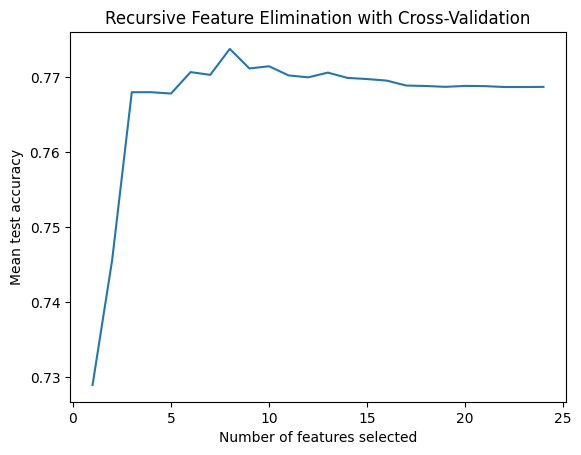

In [ ]:
import numpy as np
from sklearn.utils import resample
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Сохраняем имена столбцов перед преобразованием в массив
feature_names = balanced_data.drop('RainTomorrow', axis=1).columns

X = balanced_data.drop('RainTomorrow', axis=1).values
y = balanced_data['RainTomorrow'].values
X = pd.DataFrame(X, columns=feature_names)

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Настройка RFECV
min_features_to_select = 1
clf = LogisticRegression(max_iter=1000, random_state=42)
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="f1",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_scaled, y)

# Вывод результатов с именами признаков
optimal_features = feature_names[rfecv.support_].tolist()
print(f"Оптимальное количество признаков: {rfecv.n_features_}")
print("Оптимальные признаки:", "', '".join(optimal_features))

# Построение графика
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.plot(
    range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select),
    rfecv.cv_results_['mean_test_score']
)
plt.title("Recursive Feature Elimination with Cross-Validation")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X = balanced_data[['MinTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am']].values
y = balanced_data['RainTomorrow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_balanced_selected = LogisticRegression(max_iter = 1000)
model_balanced_selected.fit(X_train, y_train)
y_pred_balanced_selected = model_balanced_selected.predict(X_test)
print("\nРезультаты zedссификации:")
print(classification_report(y_test, y_pred_balanced_selected))
y_pred_balanced_selected = model_balanced_selected.predict(X_test)
accuracy_balanced_selected = accuracy_score(y_test, y_pred_balanced_selected)
f1_balanced_selected = f1_score(y_test, y_pred_balanced_selected)
roc_auc_balanced_selected = roc_auc_score(y_test, y_pred_balanced_selected)

print('Accuracy = ', accuracy_balanced_selected)
print('F-1 Score = ', f1_balanced_selected)
print('ROC-AUC = ', roc_auc_balanced_selected)


Результаты zedссификации:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79     10980
           1       0.78      0.78      0.78     10625

    accuracy                           0.78     21605
   macro avg       0.78      0.78      0.78     21605
weighted avg       0.78      0.78      0.78     21605

Accuracy =  0.7845406155982412
F-1 Score =  0.7816706533464659
ROC-AUC =  0.7845364405871639


**Meh**

##### **Applyed to Balanced data with generated features:**

**Now we will fit linear regression with data with generated features after Feature Selection, so as to understand, whether we will benefit from it or not.**

Оптимальное количество признаков: 18
Оптимальные признаки: MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'MinTemp_x_Humidity9am', 'MaxTemp_x_Humidity3pm', 'Temp3pm_x_Humidity3pm', 'Humidity9am_x_Cloud9am', 'Humidity3pm_x_Cloud3pm


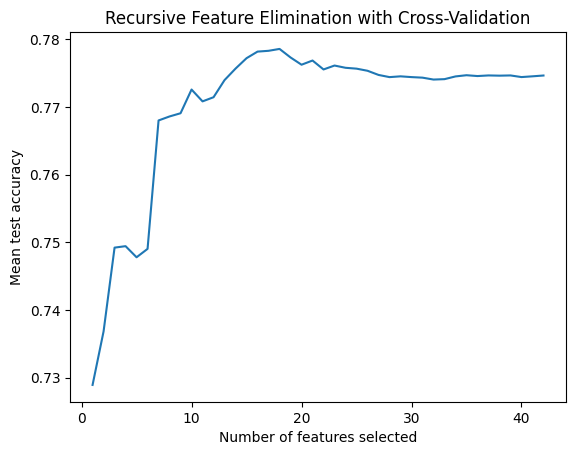

In [ ]:
import numpy as np
from sklearn.utils import resample
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Сохраняем имена столбцов перед преобразованием в массив
feature_names = interaction_df.drop('RainTomorrow', axis=1).columns

X = interaction_df.drop('RainTomorrow', axis=1).values
y = interaction_df['RainTomorrow'].values
X = pd.DataFrame(X, columns=feature_names)

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Настройка RFECV
min_features_to_select = 1
clf = LogisticRegression(max_iter=1000, random_state=42)
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="f1",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_scaled, y)

# Вывод результатов с именами признаков
optimal_features = feature_names[rfecv.support_].tolist()
print(f"Оптимальное количество признаков: {rfecv.n_features_}")
print("Оптимальные признаки:", "', '".join(optimal_features))

# Построение графика
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.plot(
    range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select),
    rfecv.cv_results_['mean_test_score']
)
plt.title("Recursive Feature Elimination with Cross-Validation")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X = interaction_df[['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'MinTemp_x_Humidity9am', 'MaxTemp_x_Humidity3pm', 'Temp3pm_x_Humidity3pm', 'Humidity9am_x_Cloud9am', 'Humidity3pm_x_Cloud3pm']].values
y = interaction_df['RainTomorrow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_interaction_df_selected = LogisticRegression(max_iter = 1000)
model_interaction_df_selected.fit(X_train, y_train)
y_pred_interaction_df_selected = model_interaction_df_selected.predict(X_test)
print("\nРезультаты zedссификации:")
print(classification_report(y_test, y_pred_interaction_df_selected))
y_pred_interaction_df_selected = model_interaction_df_selected.predict(X_test)
accuracy_interaction_df_selected = accuracy_score(y_test, y_pred_interaction_df_selected)
f1_interaction_df_selected = f1_score(y_test, y_pred_interaction_df_selected)
roc_auc_interaction_df_selected = roc_auc_score(y_test, y_pred_interaction_df_selected)

print('Accuracy = ', accuracy_interaction_df_selected)
print('F-1 Score = ', f1_interaction_df_selected)
print('ROC-AUC = ', roc_auc_interaction_df_selected)


Результаты zedссификации:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80     10980
           1       0.79      0.79      0.79     10625

    accuracy                           0.79     21605
   macro avg       0.79      0.79      0.79     21605
weighted avg       0.79      0.79      0.79     21605

Accuracy =  0.7938903031705624
F-1 Score =  0.7896054807465155
ROC-AUC =  0.7937699774991964


### **5. Re-fitting the Model:**

**Now we will fit UMAP with the dataset after feature generation and feature selection.**


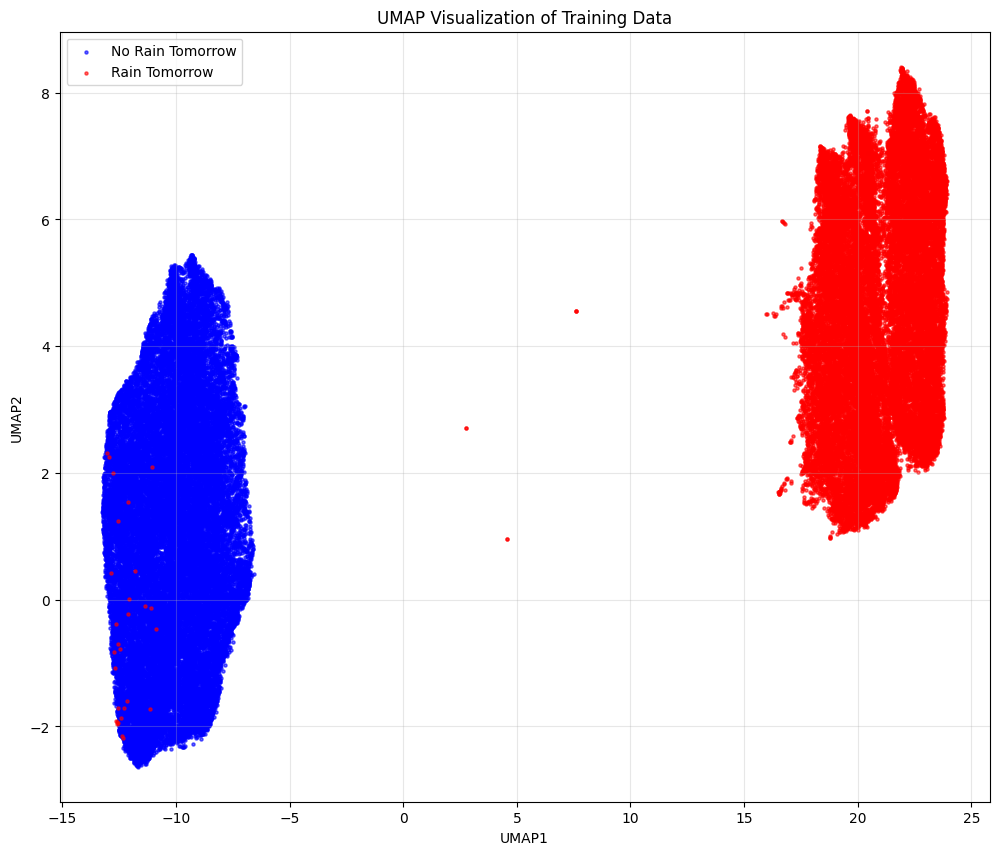

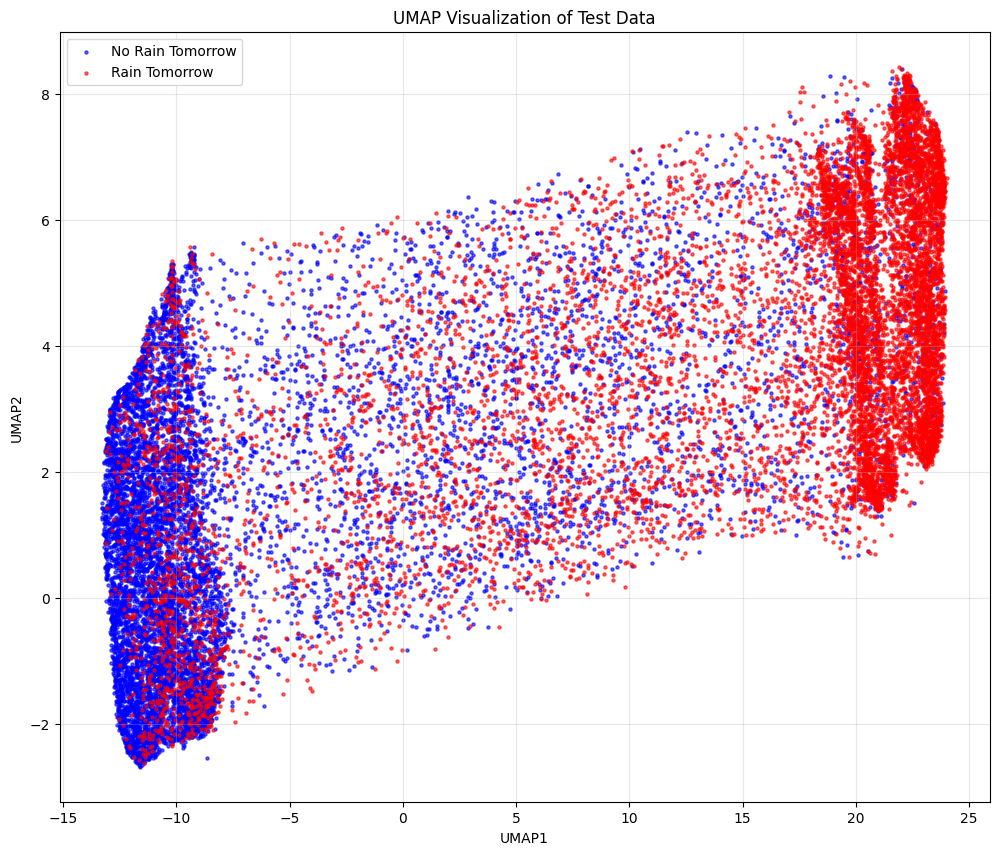


Метрики качества модели:
Accuracy: 0.799
F1-score: 0.799
ROC AUC: 0.799

Полный отчет:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80     10980
           1       0.78      0.81      0.80     10625

    accuracy                           0.80     21605
   macro avg       0.80      0.80      0.80     21605
weighted avg       0.80      0.80      0.80     21605



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

# Разделение данных
X = interaction_df[['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'MinTemp_x_Humidity9am', 'MaxTemp_x_Humidity3pm', 'Temp3pm_x_Humidity3pm', 'Humidity9am_x_Cloud9am', 'Humidity3pm_x_Cloud3pm']].values
y = interaction_df['RainTomorrow'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Предобработка данных
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Настройка и обучение supervised UMAP
mapper = umap.UMAP(
    n_components=2,
    n_neighbors=50,
    min_dist=0.1,
    metric='cosine',
    random_state=42,
    n_epochs=200,
    transform_queue_size=4.0
)

# Обучаем UMAP на тренировочных данных с метками классов
X_train_umap = mapper.fit_transform(X_train_scaled, y_train)

# Трансформируем тестовые данные
X_test_umap = mapper.transform(X_test_scaled)

# Визуализация обучающих данных
plt.figure(figsize=(12, 10))
plt.scatter(X_train_umap[y_train == 0, 0], X_train_umap[y_train == 0, 1],
           c='blue', label='No Rain Tomorrow', alpha=0.6, s=5)
plt.scatter(X_train_umap[y_train == 1, 0], X_train_umap[y_train == 1, 1],
           c='red', label='Rain Tomorrow', alpha=0.6, s=5)
plt.title('UMAP Visualization of Training Data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
# Дополнительная визуализация результатов на тестовых данных
plt.figure(figsize=(12, 10))
rain_tomorrow_test = y_test == 1
no_rain_tomorrow_test = y_test == 0

plt.scatter(X_test_umap[no_rain_tomorrow_test, 0], X_test_umap[no_rain_tomorrow_test, 1],
           c='blue', label='No Rain Tomorrow', alpha=0.6, s=5)
plt.scatter(X_test_umap[rain_tomorrow_test, 0], X_test_umap[rain_tomorrow_test, 1],
           c='red', label='Rain Tomorrow', alpha=0.6, s=5)

plt.title('UMAP Visualization of Test Data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
# Обучение логистической регрессии
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_umap, y_train)

# Предсказания и оценка качества
y_pred = lr_model.predict(X_test_umap)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("\nМетрики качества модели:")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print("\nПолный отчет:")
print(classification_report(y_test, y_pred))

The model demonstrates good predictive performance, with an accuracy of 79,9% and balanced F1-scores across both classes.
While the precision and recall for class 0 (No Rain) are slightly lower than for class 1 (Rain), the differences are not significant, indicating a well-performing model.

**Now we will fit UMAP with balanced data.**


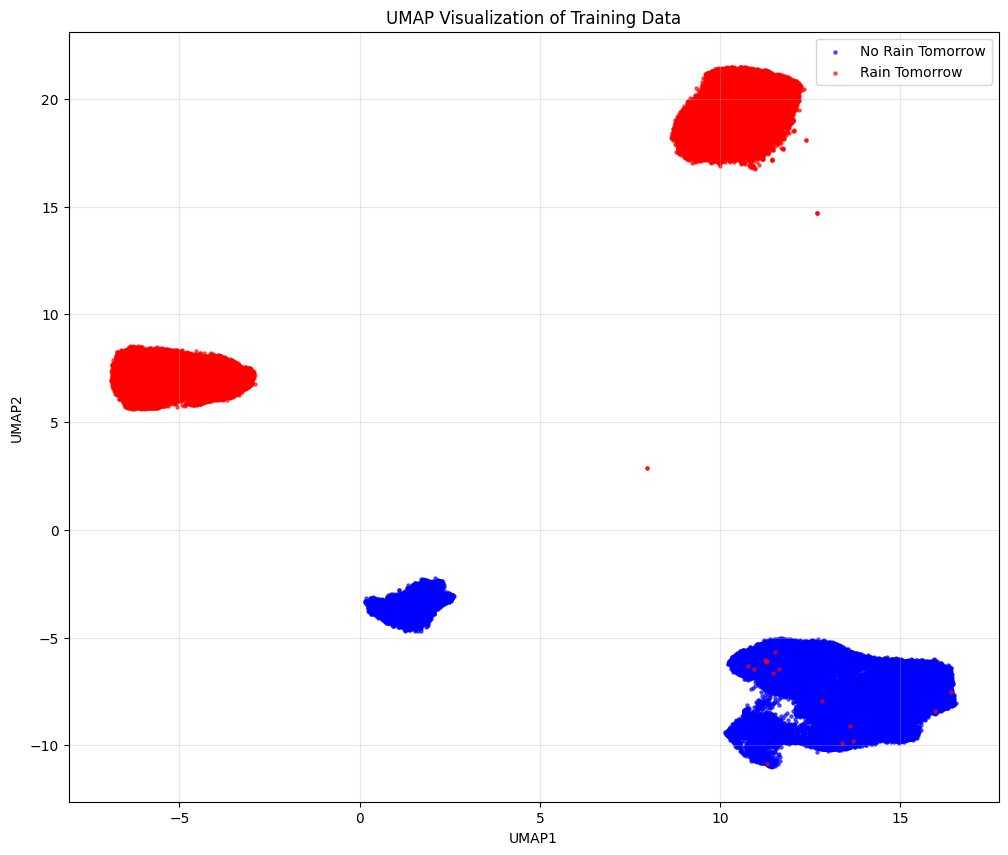

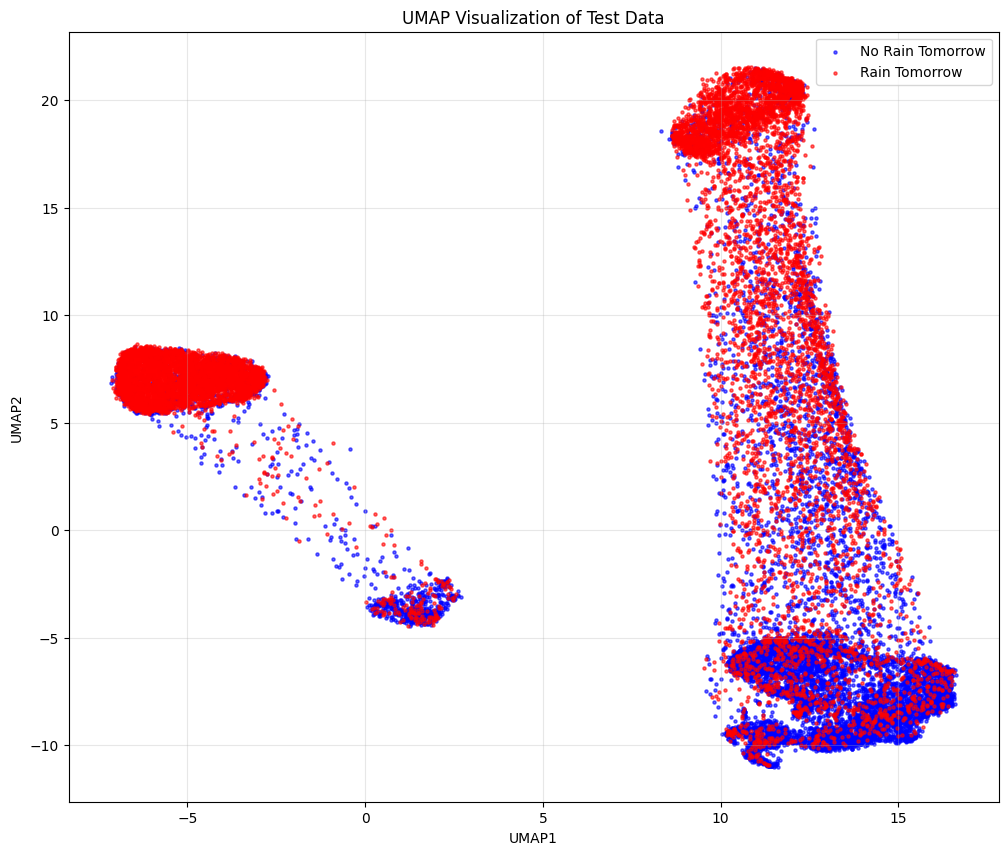


Метрики качества модели:
Accuracy: 0.795
F1-score: 0.806
ROC AUC: 0.796

Полный отчет:
              precision    recall  f1-score   support

           0       0.85      0.73      0.78     10980
           1       0.75      0.86      0.81     10625

    accuracy                           0.80     21605
   macro avg       0.80      0.80      0.79     21605
weighted avg       0.80      0.80      0.79     21605



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

# Разделение данных
X = balanced_data.drop('RainTomorrow', axis=1).values
y = balanced_data['RainTomorrow'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Предобработка данных
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Настройка и обучение supervised UMAP
mapper = umap.UMAP(
    n_components=2,
    n_neighbors=50,
    min_dist=0.1,
    metric='cosine',
    random_state=42,
    n_epochs=200,
    transform_queue_size=4.0
)

# Обучаем UMAP на тренировочных данных с метками классов
X_train_umap = mapper.fit_transform(X_train_scaled, y_train)

# Трансформируем тестовые данные
X_test_umap = mapper.transform(X_test_scaled)

# Визуализация обучающих данных
plt.figure(figsize=(12, 10))
plt.scatter(X_train_umap[y_train == 0, 0], X_train_umap[y_train == 0, 1],
           c='blue', label='No Rain Tomorrow', alpha=0.6, s=5)
plt.scatter(X_train_umap[y_train == 1, 0], X_train_umap[y_train == 1, 1],
           c='red', label='Rain Tomorrow', alpha=0.6, s=5)
plt.title('UMAP Visualization of Training Data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
# Дополнительная визуализация результатов на тестовых данных
plt.figure(figsize=(12, 10))
rain_tomorrow_test = y_test == 1
no_rain_tomorrow_test = y_test == 0

plt.scatter(X_test_umap[no_rain_tomorrow_test, 0], X_test_umap[no_rain_tomorrow_test, 1],
           c='blue', label='No Rain Tomorrow', alpha=0.6, s=5)
plt.scatter(X_test_umap[rain_tomorrow_test, 0], X_test_umap[rain_tomorrow_test, 1],
           c='red', label='Rain Tomorrow', alpha=0.6, s=5)

plt.title('UMAP Visualization of Test Data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
# Обучение логистической регрессии
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_umap, y_train)

# Предсказания и оценка качества
y_pred = lr_model.predict(X_test_umap)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("\nМетрики качества модели:")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print("\nПолный отчет:")
print(classification_report(y_test, y_pred))

The model demonstrates good predictive performance, with an accuracy of 79,5% and balanced F1-scores across both classes.
While the precision and recall for class 0 (No Rain) are slightly lower than for class 1 (Rain), the differences are not significant, indicating a well-performing model.

##**Conclusion**

Initially, there was a significant difference in the number of instances for the classes "No rain" (0) and "Rain" (1). This discrepancy could affect the accuracy of the model's predictions. To solve this problem, steps have been taken to balance classes, which is an important step to improve the quality of the model.

Logistic regression was chosen as a model for prediction. The evaluation of the model quality showed the following results:

- Accuracy: 0.795
- F1-score: 0.806
- ROC AUC: 0.796

These indicators confirm that the model demonstrates good predictive ability with relatively balanced F1 metrics for both classes. Despite small differences in accuracy and completeness for classes, the model as a whole shows reliable results.